In this notebook, we will dive deeper into the analysis of high-risk churn customers, identified using the predictive probabilities from the LightGBM model. This model was selected for its superior accuracy and AUC-ROC performance during the modeling phase. The goal of this post-prediction analysis is to provide a clear overview of the most at-risk customers and offer actionable insights to guide marketing and operational strategies for customer retention.


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Load the high-risk customers CSV file into a DataFrame
high_risk_customers = pd.read_csv('/content/drive/My Drive/DATASET/high_risk_customers_lgbm.csv')

# Display the first 5 rows to check the data
print(high_risk_customers.head())

# Get general information about the dataset
print(high_risk_customers.info())

# Display descriptive statistics for the dataset
print(high_risk_customers.describe())

Mounted at /content/drive
      id  CustomerId  CreditScore  Gender   Age  Tenure  Balance  \
0  10005  15576077.0        679.0       0  50.0     7.0      0.0   
1  11994  15707042.0        724.0       1  56.0     1.0      0.0   
2   5597  15684958.0        638.0       1  41.0     3.0      0.0   
3  14681  15591698.0        684.0       1  53.0     3.0      0.0   
4   3963  15725024.0        639.0       0  44.0     9.0      0.0   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0            1.0        1.0             0.0        140941.47   
1            2.0        1.0             0.0         90905.94   
2            1.0        1.0             0.0        136028.98   
3            1.0        0.0             1.0        175373.46   
4            1.0        0.0             0.0         18092.66   

   Geography_Germany  Geography_Spain  Churn_Probability  True_Label  
0              False             True           0.913994         1.0  
1              False             True 

In [ ]:
# Count the number of high-risk customers who actually churned (True_Label = 1)
high_risk_and_churned = high_risk_customers[high_risk_customers['True_Label'] == 1]

# Display the result
print(f"Number of high-risk customers who actually churned: {high_risk_and_churned.shape[0]}")

Number of high-risk customers who actually churned: 170


---> Out of 190 high-risk customers identified by the model, 170 have already left the bank, highlighting the model's strong predictive accuracy in identifying potential churners.

## Creating and Saving Customer Segments Based on Intervals for Enhanced Analysis

In [ ]:
# 1. Create intervals for Age
age_bins = [18, 35, 55, 72]
age_labels = ['Young (18-35)', 'Middle-aged (36-55)', 'Senior (56-72)']
high_risk_customers['Age_Group'] = pd.cut(high_risk_customers['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# 2. Create intervals for Balance
balance_bins = [0, 50000, 200000, 1500000]
balance_labels = ['Low (0-50k)', 'Medium (50k-200k)', 'High (200k-1.5m)']
high_risk_customers['Balance_Group'] = pd.cut(high_risk_customers['Balance'], bins=balance_bins, labels=balance_labels, include_lowest=True)

# 3. Create intervals for Credit Score
credit_bins = [431, 600, 700, 850]
credit_labels = ['Poor (431-600)', 'Fair (601-700)', 'Good (701-850)']
high_risk_customers['Credit_Score_Group'] = pd.cut(high_risk_customers['CreditScore'], bins=credit_bins, labels=credit_labels, include_lowest=True)

# 4. Create intervals for Estimated Salary
salary_bins = [11600, 100000, 1000000, 6090000]
salary_labels = ['Low (11.6k-100k)', 'Medium (100k-1m)', 'High (1m-6.09m)']
high_risk_customers['Estimated_Salary_Group'] = pd.cut(high_risk_customers['EstimatedSalary'], bins=salary_bins, labels=salary_labels, include_lowest=True)

# Save the updated DataFrame to a new CSV file
high_risk_customers.to_csv('/content/drive/My Drive/DATASET/high_risk_customers_with_intervals.csv', index=False)

# Preview the updated DataFrame
print(high_risk_customers.head())


      id  CustomerId  CreditScore  Gender   Age  Tenure  Balance  \
0  10005  15576077.0        679.0       0  50.0     7.0      0.0   
1  11994  15707042.0        724.0       1  56.0     1.0      0.0   
2   5597  15684958.0        638.0       1  41.0     3.0      0.0   
3  14681  15591698.0        684.0       1  53.0     3.0      0.0   
4   3963  15725024.0        639.0       0  44.0     9.0      0.0   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0            1.0        1.0             0.0        140941.47   
1            2.0        1.0             0.0         90905.94   
2            1.0        1.0             0.0        136028.98   
3            1.0        0.0             1.0        175373.46   
4            1.0        0.0             0.0         18092.66   

   Geography_Germany  Geography_Spain  Churn_Probability  True_Label  \
0              False             True           0.913994         1.0   
1              False             True           0.702215      

## Visualization and Analysis of High-Risk Customer Distributions by Key Attributes

<ipython-input-3-caa84957f0a0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette=color_palette)


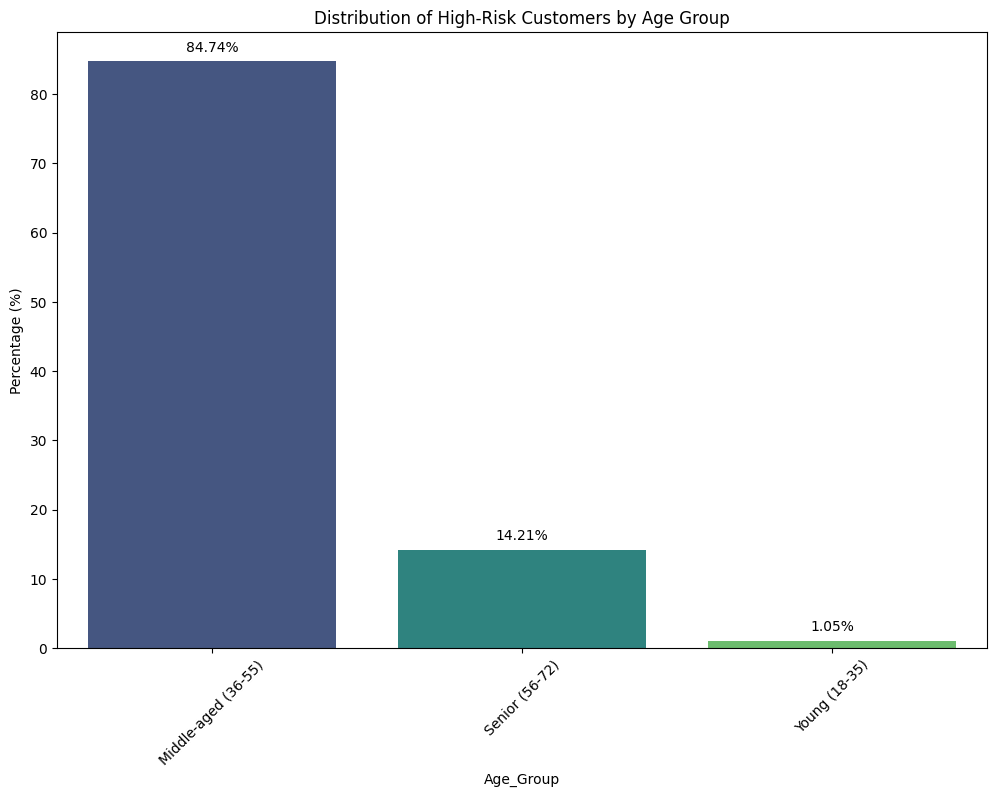

<ipython-input-3-caa84957f0a0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette=color_palette)


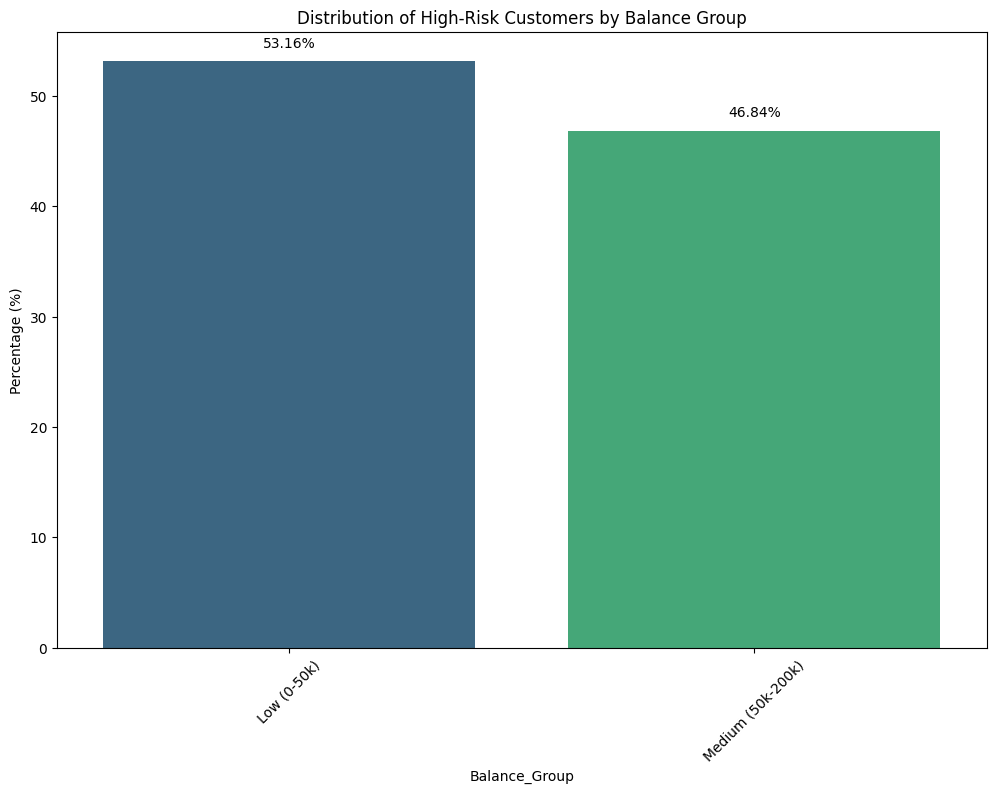

<ipython-input-3-caa84957f0a0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette=color_palette)


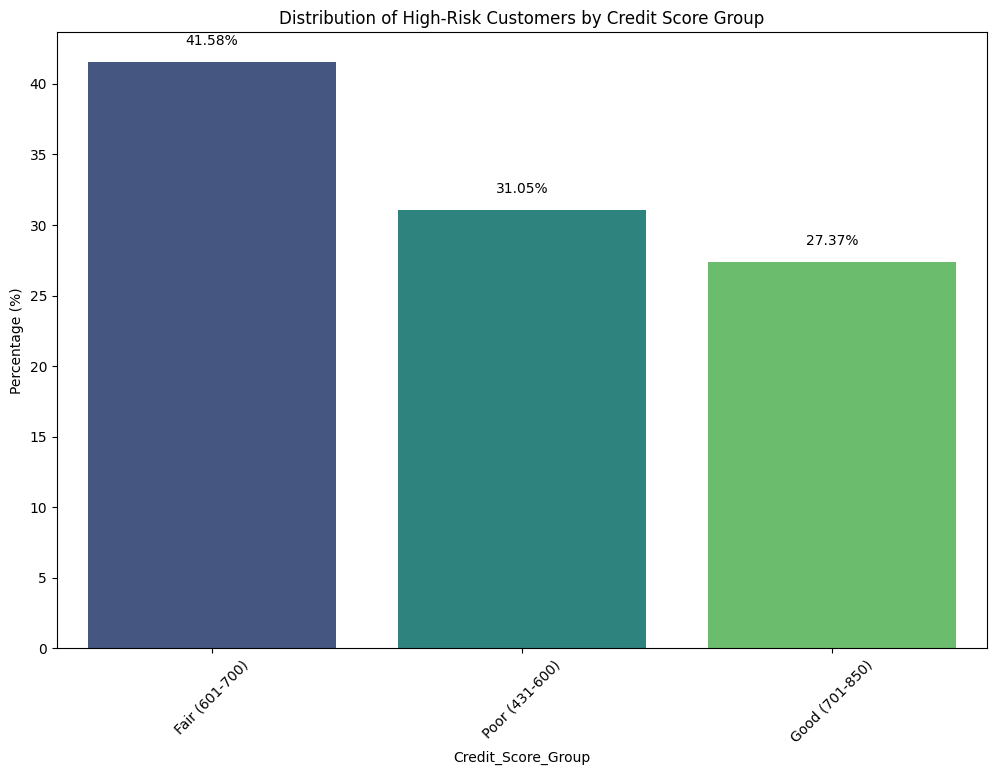

<ipython-input-3-caa84957f0a0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette=color_palette)


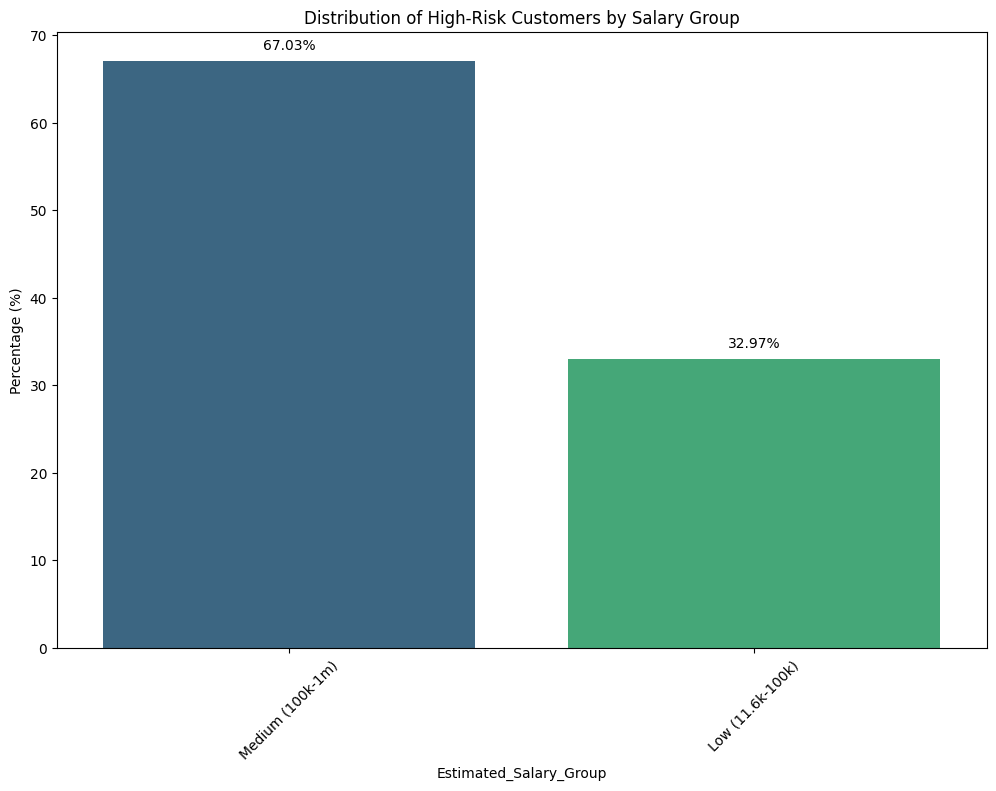

<ipython-input-3-caa84957f0a0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette=color_palette)


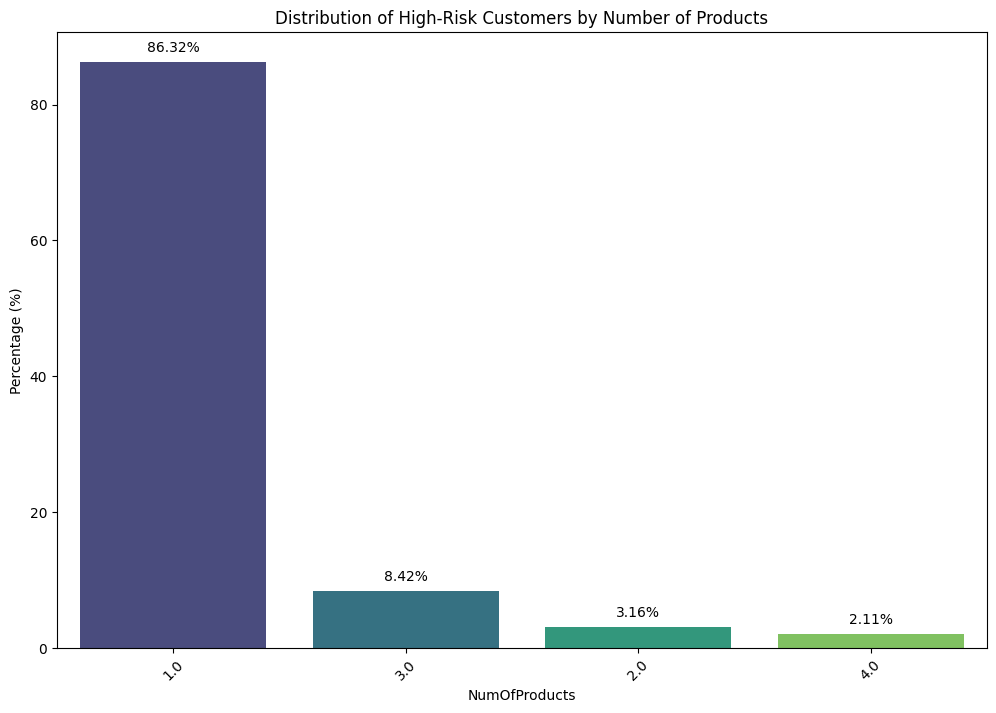

<ipython-input-3-caa84957f0a0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette=color_palette)


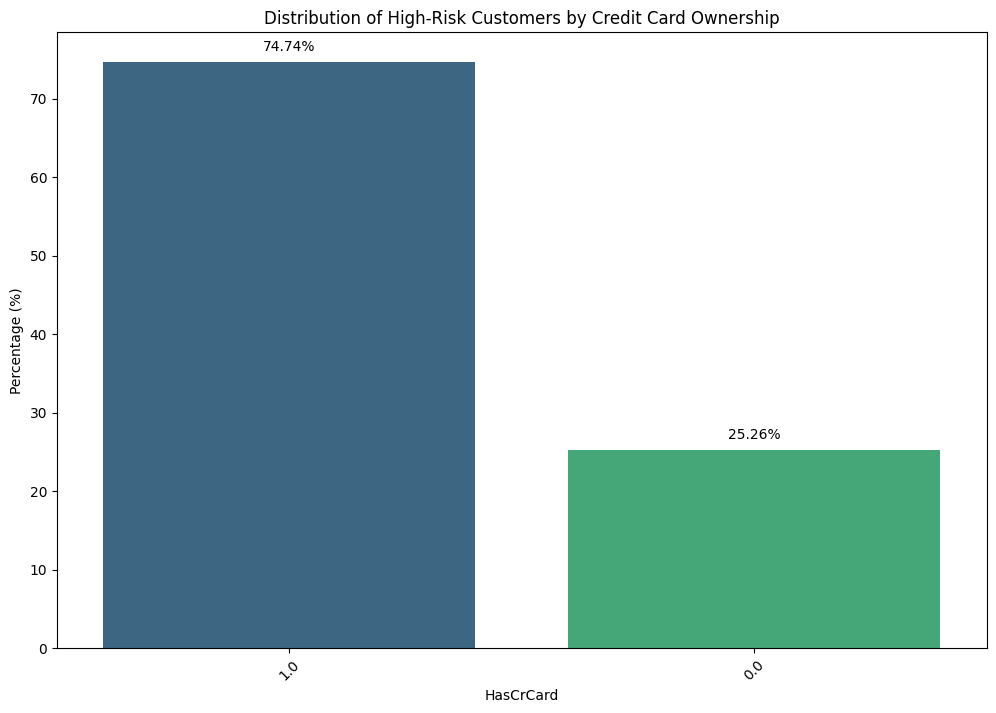

<ipython-input-3-caa84957f0a0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette=color_palette)


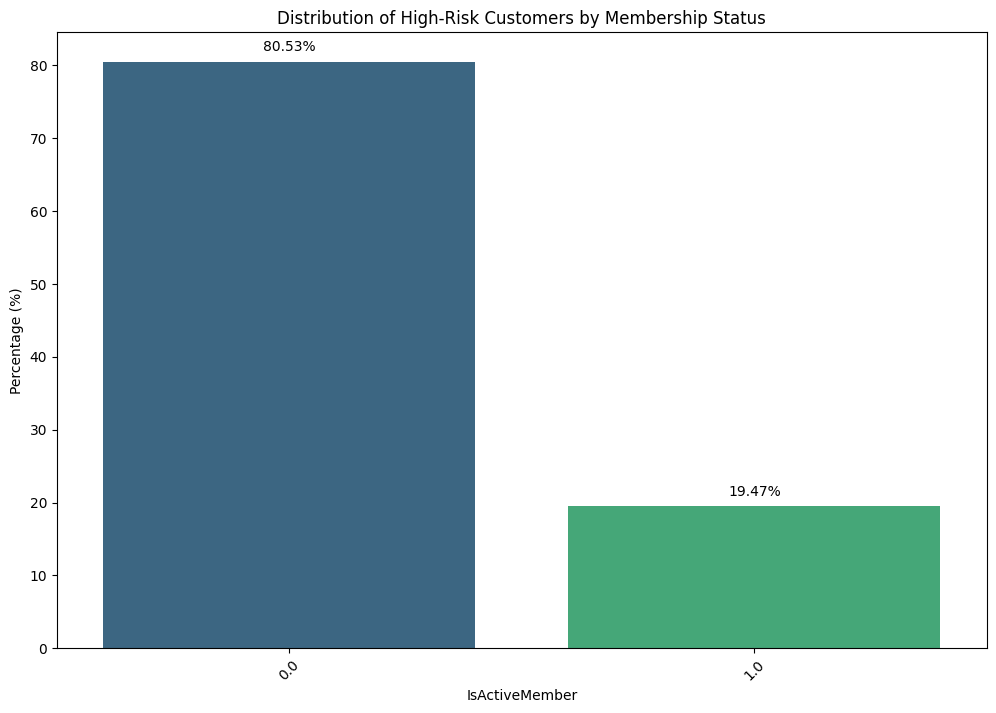

<ipython-input-3-caa84957f0a0>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_percentage_distribution.index, y=geo_percentage_distribution.values, palette='Set1')


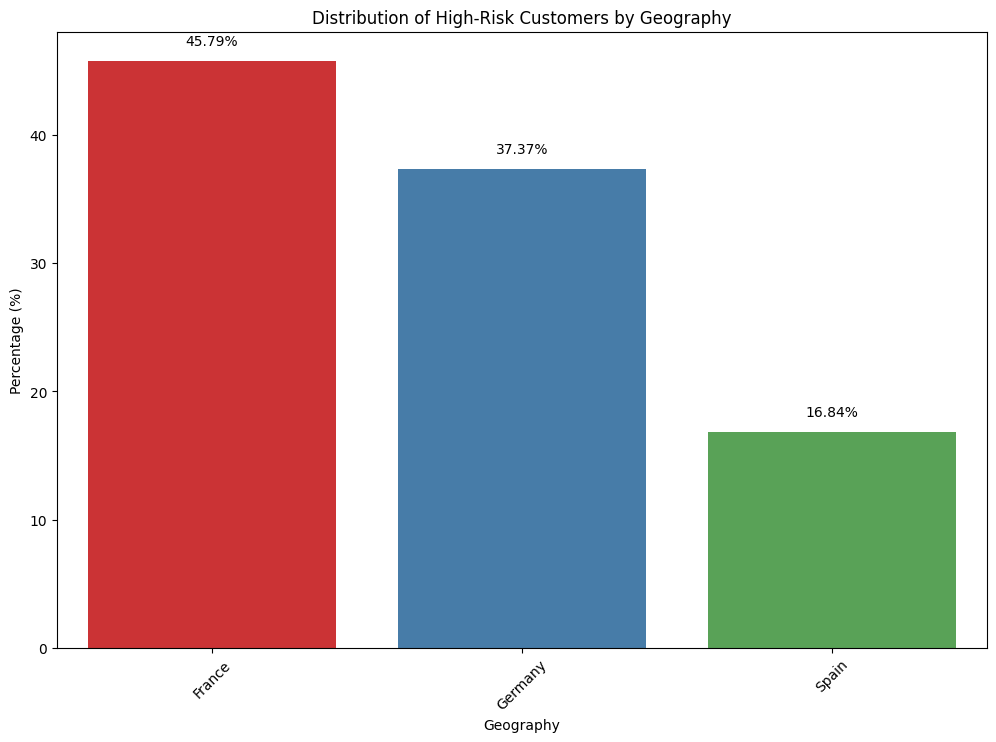

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
high_risk_customers = pd.read_csv('/content/drive/My Drive/DATASET/high_risk_customers_with_intervals.csv')

# Function to calculate percentages and create visualizations
def plot_percentage_distribution(column_name, title, color_palette='viridis'):
    if column_name in high_risk_customers.columns:
        # Calculate percentage distribution
        percentage_distribution = high_risk_customers[column_name].value_counts(normalize=True) * 100

        # Create the bar plot
        plt.figure(figsize=(12, 8))
        sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette=color_palette)
        plt.title(title)
        plt.xlabel(column_name)
        plt.ylabel('Percentage (%)')
        plt.xticks(rotation=45)

        # Show the percentages on the plot
        for index, value in enumerate(percentage_distribution.values):
            plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

        plt.show()
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")

# Calculate and visualize percentages for each column of interest

# Age Groups
plot_percentage_distribution('Age_Group', 'Distribution of High-Risk Customers by Age Group')

# Balance Groups
plot_percentage_distribution('Balance_Group', 'Distribution of High-Risk Customers by Balance Group')

# Credit Score Groups
plot_percentage_distribution('Credit_Score_Group', 'Distribution of High-Risk Customers by Credit Score Group')

# Salary Groups
plot_percentage_distribution('Estimated_Salary_Group', 'Distribution of High-Risk Customers by Salary Group')

# Number of Products
plot_percentage_distribution('NumOfProducts', 'Distribution of High-Risk Customers by Number of Products')

# Credit Card Ownership
plot_percentage_distribution('HasCrCard', 'Distribution of High-Risk Customers by Credit Card Ownership')

# Membership Status
plot_percentage_distribution('IsActiveMember', 'Distribution of High-Risk Customers by Membership Status')

# Combine geographical columns into a single DataFrame for visualization
geo_columns = ['Geography_Germany', 'Geography_Spain']  # 'Geography_France' is assumed to be missing or not included
geo_df = high_risk_customers[geo_columns].copy()
geo_df['Geography'] = geo_df.apply(lambda row: 'Germany' if row['Geography_Germany'] else ('Spain' if row['Geography_Spain'] else 'France'), axis=1)

# Calculate percentage distribution for geographical regions
geo_percentage_distribution = geo_df['Geography'].value_counts(normalize=True) * 100

# Create the bar plot for geographical distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=geo_percentage_distribution.index, y=geo_percentage_distribution.values, palette='Set1')
plt.title('Distribution of High-Risk Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

# Show the percentages on the plot
for index, value in enumerate(geo_percentage_distribution.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()


## The insights:
1. The majority of high-risk customers are middle-aged (36-55), with a very small proportion being young.
2. High-risk customers are almost evenly split between low and medium balance categories.
3. A significant portion of high-risk customers have fair or poor credit scores.
4. Most high-risk customers have medium salaries, while a smaller proportion have low salaries.
5.  The vast majority of high-risk customers hold only one product.
6.  A majority of high-risk customers have a credit card.
7. The majority of high-risk customers are not active members.
8. High-risk customers are most prevalent in France, followed by Germany and Spain.

# Segmentation and Profiling by Country


--- Customer Profile for Germany ---


Age_Group distribution in Germany:
  Middle-aged (36-55): 88.73%
  Senior (56-72): 11.27%


<ipython-input-8-e78857ca9fdc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


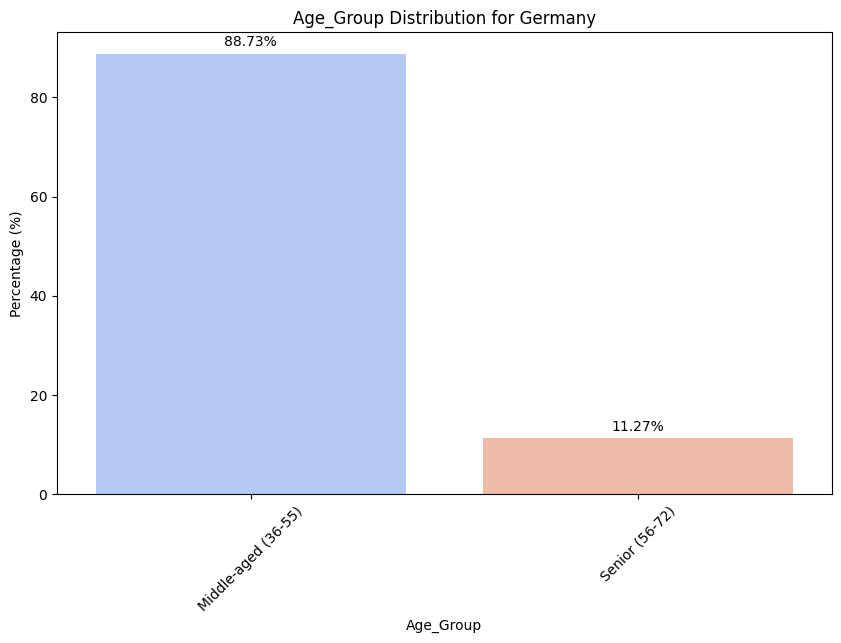


Balance_Group distribution in Germany:
  Medium (50k-200k): 100.00%


<ipython-input-8-e78857ca9fdc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


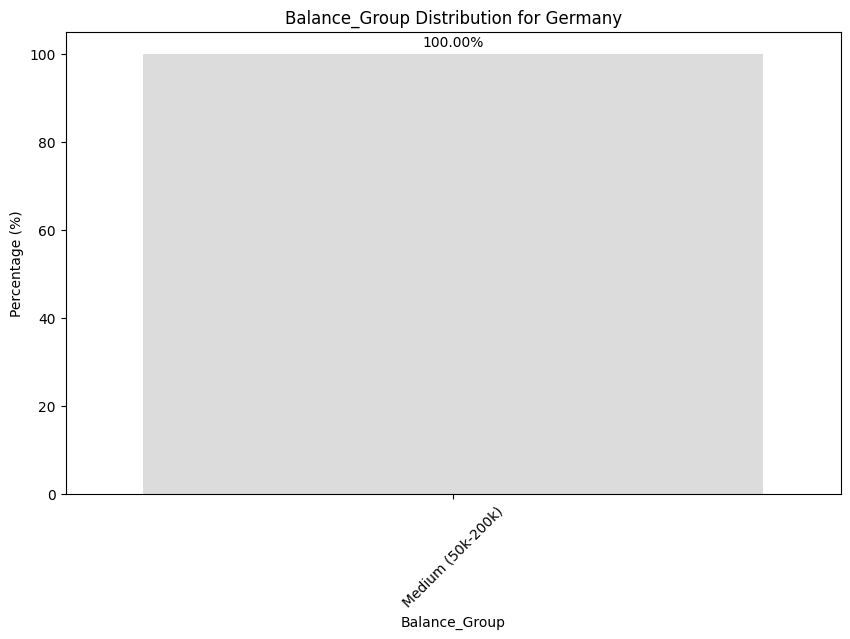


Credit_Score_Group distribution in Germany:
  Fair (601-700): 40.85%
  Poor (431-600): 32.39%
  Good (701-850): 26.76%


<ipython-input-8-e78857ca9fdc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


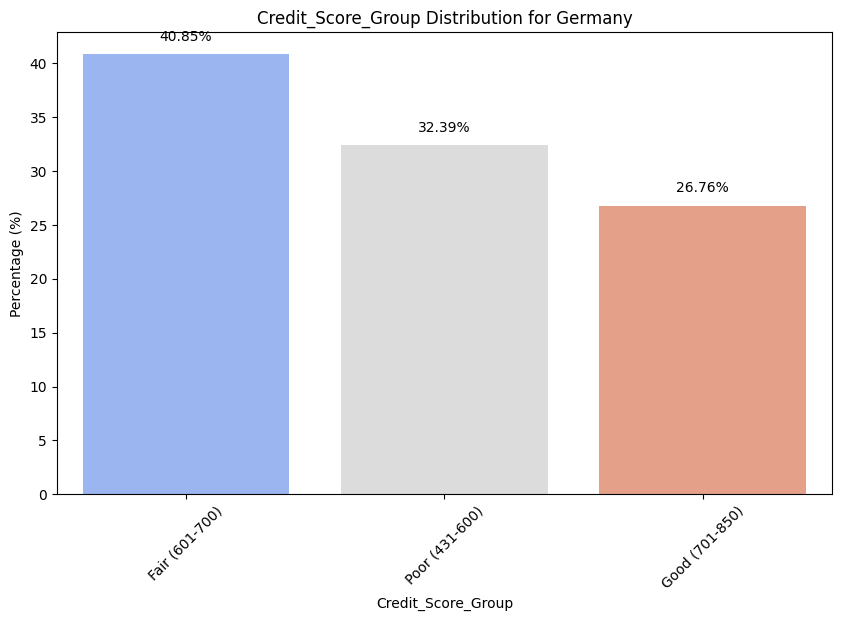


Estimated_Salary_Group distribution in Germany:
  Medium (100k-1m): 68.66%
  Low (11.6k-100k): 31.34%


<ipython-input-8-e78857ca9fdc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


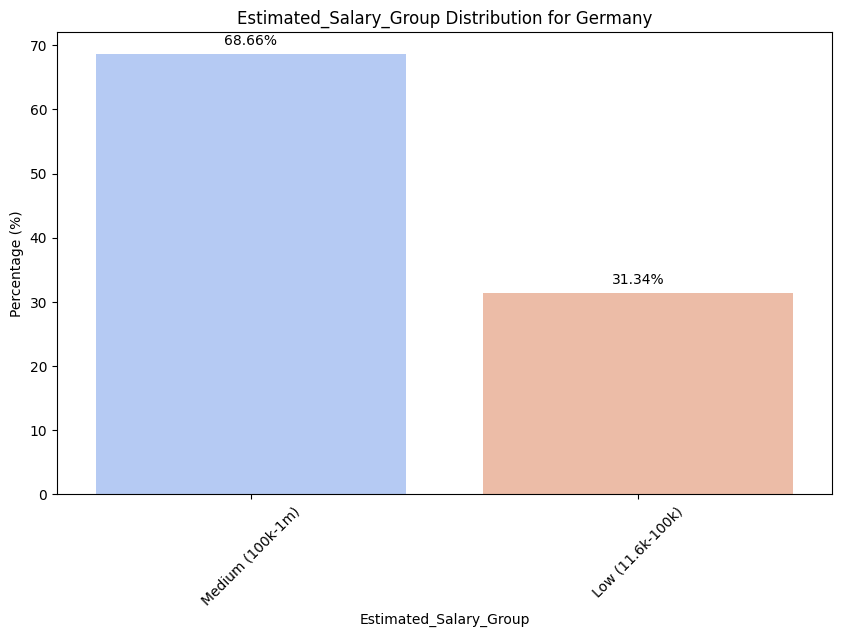


NumOfProducts distribution in Germany:
  1.0: 85.92%
  3.0: 9.86%
  2.0: 2.82%
  4.0: 1.41%


<ipython-input-8-e78857ca9fdc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


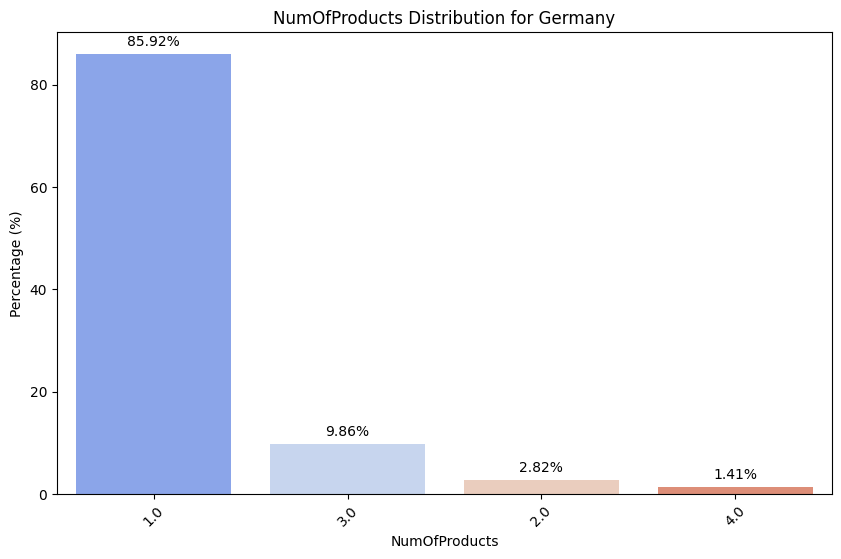


--- Customer Profile for Spain ---


Age_Group distribution in Spain:
  Middle-aged (36-55): 78.12%
  Senior (56-72): 18.75%
  Young (18-35): 3.12%


<ipython-input-8-e78857ca9fdc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


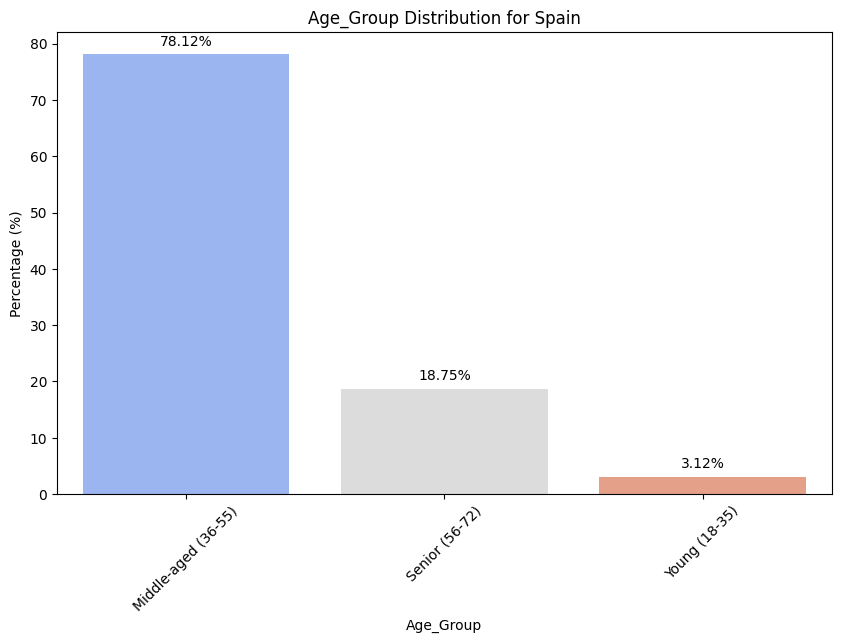


Balance_Group distribution in Spain:
  Low (0-50k): 81.25%
  Medium (50k-200k): 18.75%


<ipython-input-8-e78857ca9fdc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


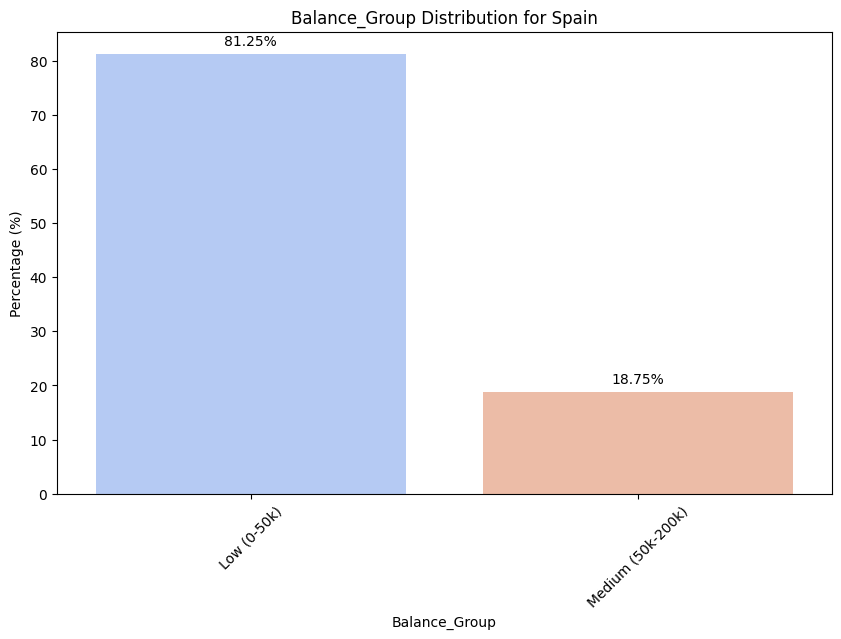


Credit_Score_Group distribution in Spain:
  Fair (601-700): 56.25%
  Poor (431-600): 25.00%
  Good (701-850): 18.75%


<ipython-input-8-e78857ca9fdc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


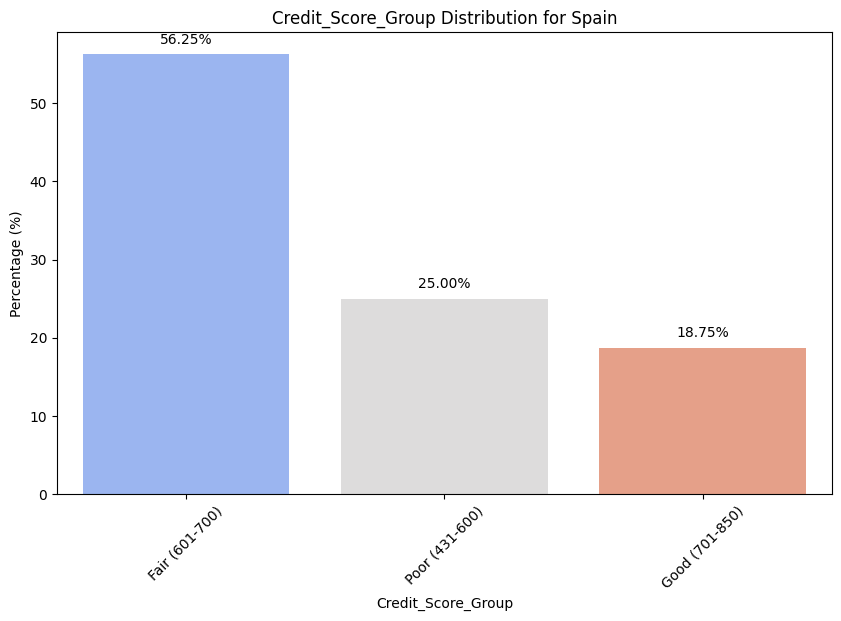


Estimated_Salary_Group distribution in Spain:
  Medium (100k-1m): 68.75%
  Low (11.6k-100k): 31.25%


<ipython-input-8-e78857ca9fdc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


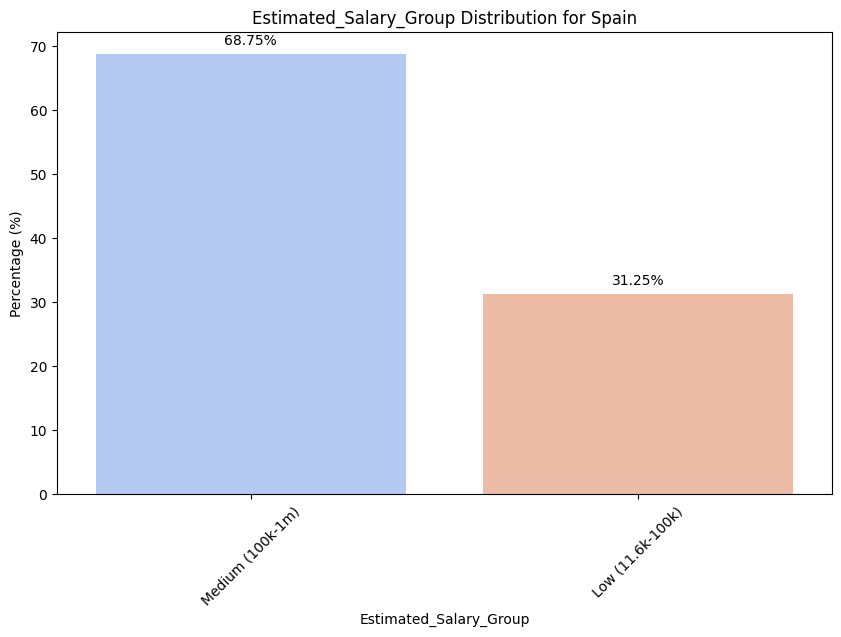


NumOfProducts distribution in Spain:
  1.0: 75.00%
  3.0: 12.50%
  2.0: 9.38%
  4.0: 3.12%


<ipython-input-8-e78857ca9fdc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


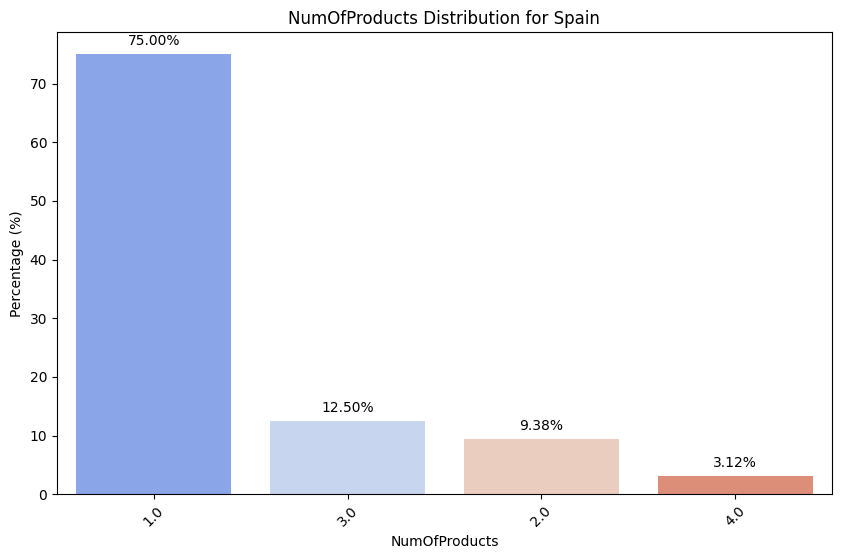


--- Customer Profile for France (derived) ---


Age_Group distribution in France:
  Middle-aged (36-55): 83.91%
  Senior (56-72): 14.94%
  Young (18-35): 1.15%


<ipython-input-8-e78857ca9fdc>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


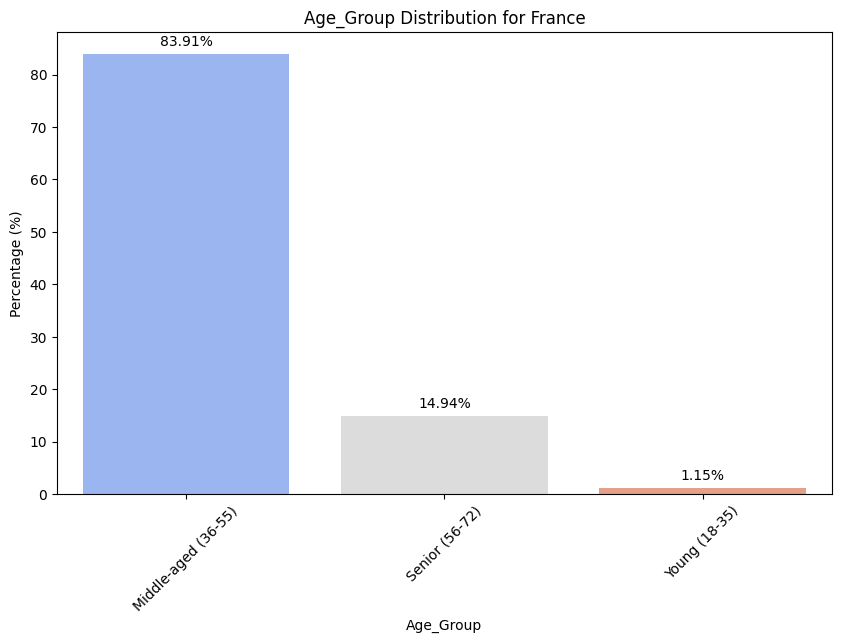


Balance_Group distribution in France:
  Low (0-50k): 86.21%
  Medium (50k-200k): 13.79%


<ipython-input-8-e78857ca9fdc>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


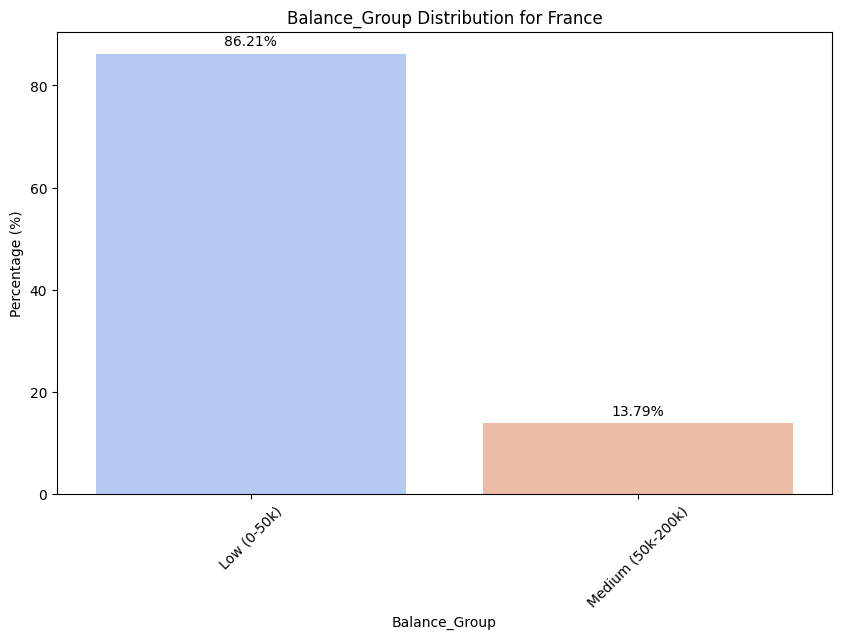


Credit_Score_Group distribution in France:
  Fair (601-700): 36.78%
  Poor (431-600): 32.18%
  Good (701-850): 31.03%


<ipython-input-8-e78857ca9fdc>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


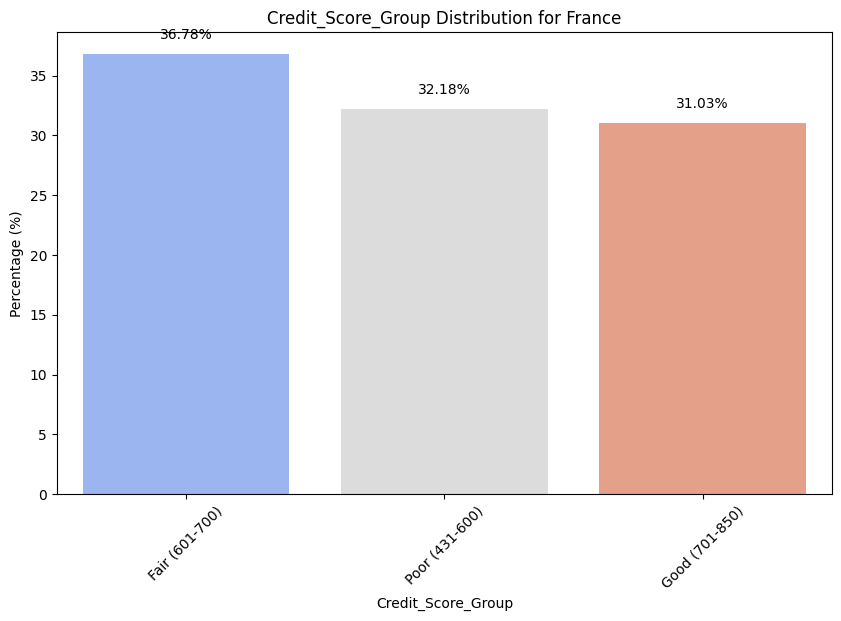


Estimated_Salary_Group distribution in France:
  Medium (100k-1m): 65.12%
  Low (11.6k-100k): 34.88%


<ipython-input-8-e78857ca9fdc>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


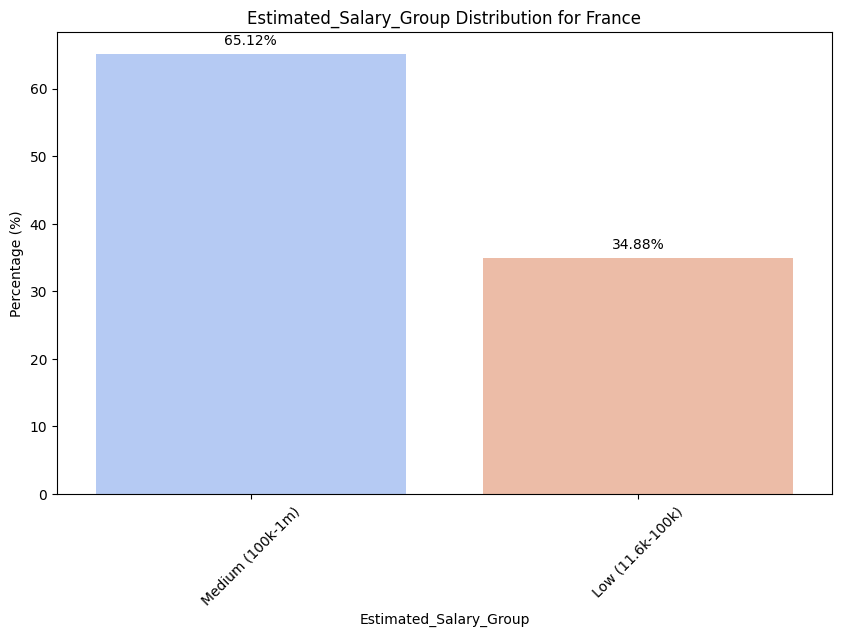


NumOfProducts distribution in France:
  1.0: 90.80%
  3.0: 5.75%
  4.0: 2.30%
  2.0: 1.15%


<ipython-input-8-e78857ca9fdc>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')


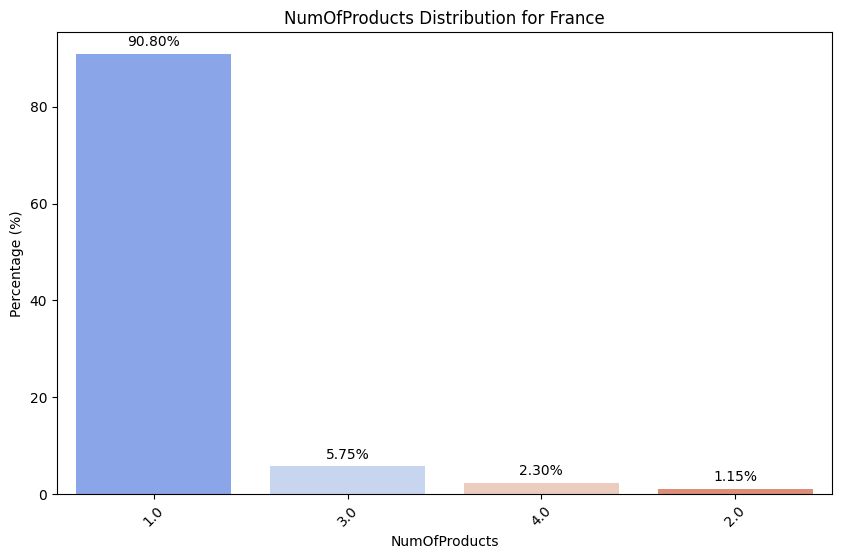

In [ ]:
# Function to calculate and display percentage distribution for each country
def display_country_profile(country_column, country_name):
    """
    This function calculates and prints the percentage distribution of high-risk customers for a given country.
    It also generates visualizations to help stakeholders understand the customer segments.
    :param country_column: Column representing the country in the dataset (e.g., Geography_Germany, Geography_Spain)
    :param country_name: The name of the country to display in the output and plots.
    """
    if country_column in high_risk_customers.columns:
        # Filter data for the specific country
        country_customers = high_risk_customers[high_risk_customers[country_column] == 1]  # 1 indicates customers in the specific country

        # Attributes to analyze and display
        attributes = ['Age_Group', 'Balance_Group', 'Credit_Score_Group', 'Estimated_Salary_Group', 'NumOfProducts']

        print(f"\n--- Customer Profile for {country_name} ---\n")

        for attribute in attributes:
            if attribute in country_customers.columns:
                # Calculate percentage distribution for each attribute
                percentage_distribution = country_customers[attribute].value_counts(normalize=True) * 100

                # Print percentage distribution for each attribute
                print(f"\n{attribute} distribution in {country_name}:")
                for group, percentage in percentage_distribution.items():
                    print(f"  {group}: {percentage:.2f}%")

                # Create a bar plot for visualizing the attribute distribution
                plt.figure(figsize=(10, 6))
                sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')
                plt.title(f'{attribute} Distribution for {country_name}')
                plt.xlabel(attribute)
                plt.ylabel('Percentage (%)')
                plt.xticks(rotation=45)

                # Add percentage labels on the bars
                for index, value in enumerate(percentage_distribution.values):
                    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

                plt.show()
            else:
                print(f"Column '{attribute}' does not exist in the DataFrame.")
    else:
        print(f"Column '{country_column}' does not exist in the DataFrame.")

# Display profile for Germany
display_country_profile('Geography_Germany', 'Germany')

# Display profile for Spain
display_country_profile('Geography_Spain', 'Spain')

# Display profile for France (derived from the other countries)
# France customers are those who are neither in Germany nor in Spain
france_customers = high_risk_customers[
    (high_risk_customers['Geography_Germany'] == 0) & (high_risk_customers['Geography_Spain'] == 0)
]

print(f"\n--- Customer Profile for France (derived) ---\n")
for attribute in ['Age_Group', 'Balance_Group', 'Credit_Score_Group', 'Estimated_Salary_Group', 'NumOfProducts']:
    if attribute in france_customers.columns:
        percentage_distribution = france_customers[attribute].value_counts(normalize=True) * 100

        print(f"\n{attribute} distribution in France:")
        for group, percentage in percentage_distribution.items():
            print(f"  {group}: {percentage:.2f}%")

        # Create a bar plot for visualizing the attribute distribution
        plt.figure(figsize=(10, 6))
        sns.barplot(x=percentage_distribution.index.astype(str), y=percentage_distribution.values, palette='coolwarm')
        plt.title(f'{attribute} Distribution for France')
        plt.xlabel(attribute)
        plt.ylabel('Percentage (%)')
        plt.xticks(rotation=45)

        # Add percentage labels on the bars
        for index, value in enumerate(percentage_distribution.values):
            plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

        plt.show()
    else:
        print(f"Column '{attribute}' does not exist in the DataFrame.")


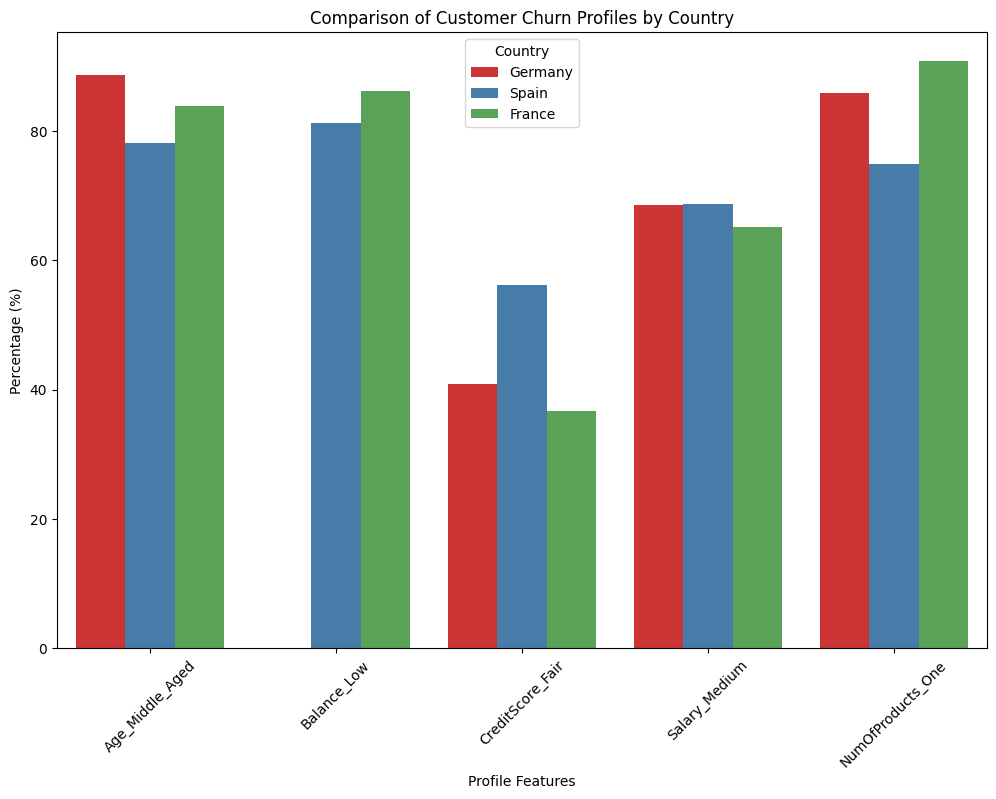

In [ ]:


# Data for the profiles
data = {
    'Country': ['Germany', 'Spain', 'France'],
    'Age_Middle_Aged': [88.73, 78.12, 83.91],
    'Balance_Low': [0, 81.25, 86.21],  # Percentage for balance low
    'CreditScore_Fair': [40.85, 56.25, 36.78],
    'Salary_Medium': [68.66, 68.75, 65.12],
    'NumOfProducts_One': [85.92, 75.00, 90.80]
}

# Create a DataFrame
profiles_df = pd.DataFrame(data)

# Set the DataFrame to be in long format for easier plotting
profiles_long = profiles_df.melt(id_vars='Country',
                                   value_vars=['Age_Middle_Aged', 'Balance_Low',
                                                'CreditScore_Fair', 'Salary_Medium',
                                                'NumOfProducts_One'],
                                   var_name='Profile_Feature',
                                   value_name='Percentage')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=profiles_long, x='Profile_Feature', y='Percentage', hue='Country', palette='Set1')
plt.title('Comparison of Customer Churn Profiles by Country')
plt.ylabel('Percentage (%)')
plt.xlabel('Profile Features')
plt.xticks(rotation=45)
plt.legend(title='Country')

# Show the plot
plt.show()
